<a href="https://colab.research.google.com/github/lucasnofear/Deep-Learning-with-Python-Practice/blob/Keras-and-Tensorflow/ch3_6_houseprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use regression to predict housing price

In [2]:
from keras.datasets import boston_housing
(train_data, train_targets),(test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 0us/step


In [3]:
train_data.shape, test_data.shape

((404, 13), (102, 13))

Prepare data

In [4]:
# Normalize feature data, it appears the data has already been normalized
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std
mean, std


(array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
        5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
        9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
        1.27408168e+01]),
 array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
        1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
        8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
        7.24556085e+00]))

Build network

In [0]:
from keras import models
from keras import layers
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu',
          input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

Use K-fold validation because of the small data size

In [10]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
                  [train_data[:i * num_val_samples],
                  train_data[(i + 1) * num_val_samples:]],
                  axis=0)
  partial_train_targets = np.concatenate(
                  [train_targets[:i * num_val_samples],
                  train_targets[(i + 1) * num_val_samples:]],
                  axis=0)
  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
          epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [11]:
all_scores

[2.0929675102233887, 2.8511390686035156, 2.5463075637817383, 2.466698169708252]

In [12]:
np.mean(all_scores)

2.4892780780792236

Run 500 epochs and save the k-fold results

In [17]:
num_epochs = 500
k = 4
num_val_samples = len(train_data) // k
all_scores = []
all_mae_histories = []

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                    train_data[(i + 1) * num_val_samples:]],axis=0)
  partial_train_targets = np.concatenate(
                    [train_targets[:i * num_val_samples],
                    train_targets[(i + 1) * num_val_samples:]],
                    axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
  validation_data=(val_data, val_targets),
  epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [18]:
history.history.keys()

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])

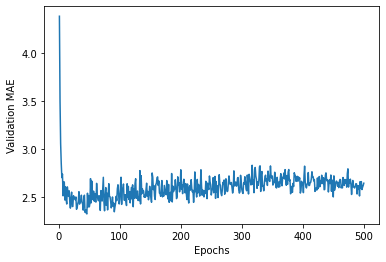

In [19]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

# plot the result
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Train the final model

In [20]:
model = build_model()
model.fit(train_data, train_targets,epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 212us/step


In [21]:
test_mae_score

2.670844793319702